In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import itertools
%matplotlib inline

# Распределение Максвелла

Распределение Максвелла (Maxwell continuous random variable) — общее наименование нескольких распределений вероятности, которые описывают статистическое поведение параметров частиц идеального газа

https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution

scipy.stats.maxwell

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.maxwell.html#scipy.stats.maxwell

Рассматривает поведения распределения для случая (scale = a):
$$ a = 1$$

В библиотеке scipy.stats по умолчание значение scale = a = 1 для функции maxwell


In [3]:
 from scipy.stats import maxwell
    

## Гистограмма выборки и теоретическая плотность распределения случайной величины

In [10]:
randomSel = maxwell.rvs(size=1000)

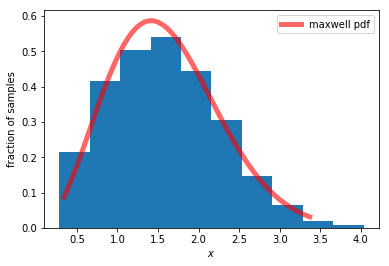

In [26]:
plt.hist(randomSel, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
x = np.linspace(maxwell.ppf(0.01),maxwell.ppf(0.99), 100)
plt.plot(x, maxwell.pdf(x),'r-', lw=5, alpha=0.6, label='maxwell pdf')
plt.legend()

### Вывод

Из графика видно, что получившаяся гистограмма относительно совпадает с функцией плотности вероятности нашего распределения.

##  Оценка распределение выборочного среднего случайной величины при разных объёмах выборок 

Будет рассматривать 4 варианта выборок соответственно по  5,10,50,250 элементов (по 1000 выборок для каждого размера)

size хранить кол-во элементов в одной выборке


sm хранить для каждой выборки вычисленное EX (c 0 по 1000 элемент - первого варианта вывборки по "5", с 1000 по 2000 элемент - первого варианта вывборки по "10" и т.д.)

In [55]:
# создадим массив выборочных средних 3000 выборок размера 5,10,50,250 (по 1000 выборок для каждого размера)
size = [5,10,50,250]
sm = []
bins = np.arange(0.5,3.5,0.05)
for i in size:
    for _ in itertools.repeat(None, 1000):
        rv = maxwell.rvs(size=i)
        sm.append(np.mean(rv))

Мы рассматривает распределение Максвела его характеристики следующие:

$$ \mu = 2a\sqrt{ \frac {2} {\pi}}$$

C учетом, что a=1 EX будет:

In [38]:
EX=2*np.sqrt(2/np.pi)
EX

1.5957691216057308

$$ \sigma^2 = \frac {a^2 (3\pi - 8)}{\pi}$$

C учетом, что a=1 фукнция для вычисления Sigma будет (где numSelection - номер выборки):

In [47]:
def Sigma(numSelection):
    return np.sqrt((3*np.pi - 8)/np.pi/size[numSelection])

Text(0,0.5,'Probability')

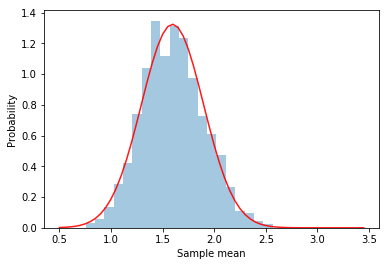

In [56]:
# построим гистограмму и график нормального распределения для выборки размера 5
plt.hist(sm[0:1000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, EX, Sigma(0)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Text(0,0.5,'Probability')

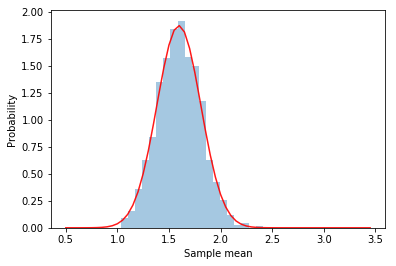

In [57]:
# построим гистограмму и график нормального распределения для выборки размера 10
plt.hist(sm[1000:2000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, EX, Sigma(1)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Text(0,0.5,'Probability')

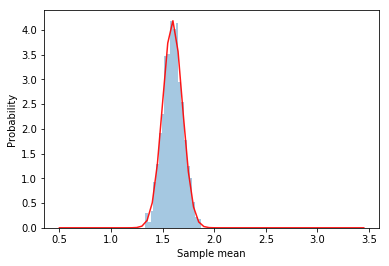

In [58]:
# построим гистограмму и график нормального распределения для выборки размера 50
plt.hist(sm[2000:3000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, EX, Sigma(2)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Text(0,0.5,'Probability')

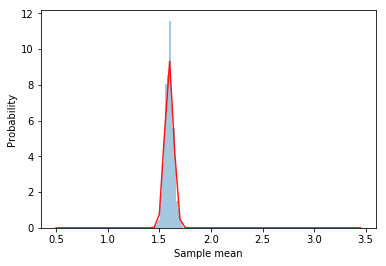

In [59]:
# построим гистограмму и график нормального распределения для выборки размера 250
plt.hist(sm[3000:4000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, EX, Sigma(3)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

### Вывод

Мы показали, что осноные моменты центральной предельной теоремы выполняются: 

Во-первых, гистограмму распределения можно описать нормальым распределением с параметрами $(EX,DX/n)$.


Во-вторых, при увеличении размера выборки, гистограмма начинает точнее соответствовать нормальному распределению, а также понижается дисперсия.